In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("eda_data.csv")
df.head()

Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded  ... age python_yn r_yn  \
0      Goleta, CA   501 to 1000 employees     1973  ...  49         1    0   
1   Baltimore, MD        10000+ employees     1984  ...  38         1    0   
2  Clearwater, FL   501 to 1000 employees     2010  ...  12         1    0   
3    Richland, WA  1001 to 5000 employees     1965  ...  57         1    0   
4    New York, NY     51 to 200 employees     1998  ...  24         1    0   

  spark_yn aws_yn  excel_yn  job_simplified  seniority  desc_len  \
0        0      0         1  data scientist         na      2536   
1        0      0         0  data scientist         na      4783   
2        1      0         1  data scientist         na      3461   
3        0      0         0  data scientist         na      3883   
4        0      0         1  data scientist         na      2728   

   competitors_count  
0                  0  
1                  0  
2                  0  
3                  3  
4                  3  

[5 rows x 33 columns]

In [2]:
# choose relevant columns
# get dummy data
# train test split
# multiple linear regression
# lasso regression
# random forest
# tune models using GridSearchCV
# test ensembles

### Choose Relevant Columns

In [3]:
df_model = df[["Rating", "Size", "Type of ownership", "Industry", "Sector", "Revenue", "competitors_count", "hourly", "employer_provided", "job_state", "same_state", "age", "python_yn", "spark_yn", "aws_yn", "excel_yn", "job_simplified", "seniority", "desc_len", "avg_salary"]]
df_model.head()

Rating                    Size   Type of ownership  \
0     3.8   501 to 1000 employees   Company - Private   
1     3.4        10000+ employees  Other Organization   
2     4.8   501 to 1000 employees   Company - Private   
3     3.8  1001 to 5000 employees          Government   
4     2.9     51 to 200 employees   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  competitors_count  hourly  \
0         $50 to $100 million (USD)                  0       0   
1            $2 to $5 billion (USD)                  0       0   
2        $100 to $500 million (USD)                  0       0   
3  $500 million to $1 billion (USD)                  3       0   
4          Unknown / Non-Applicable                  3       0   

   employer_provided job_state  same_state  age  python_yn  spark_yn  aws_yn  \
0                  0        NM           0   49          1         0       0   
1                  0        MD           0   38          1         0       0   
2                  0        FL           1   12          1         1       0   
3                  0        WA           1   57          1         0       0   
4                  0        NY           1   24          1         0       0   

   excel_yn  job_simplified seniority  desc_len  avg_salary  
0         1  data scientist        na      2536        72.0  
1         0  data scientist        na      4783        87.5  
2         1  data scientist        na      3461        85.0  
3         0  data scientist        na      3883        76.5  
4         1  data scientist        na      2728       114.5

### Get Dummy Data for Categorical Data

In [4]:
df_dummy = pd.get_dummies(df_model)
pd.set_option('display.max_rows', None)
for i in df_dummy.columns:
    print(i)

Rating
competitors_count
hourly
employer_provided
same_state
age
python_yn
spark_yn
aws_yn
excel_yn
desc_len
avg_salary
Size_-1
Size_1 to 50 employees
Size_10000+ employees
Size_1001 to 5000 employees
Size_201 to 500 employees
Size_5001 to 10000 employees
Size_501 to 1000 employees
Size_51 to 200 employees
Size_Unknown
Type of ownership_-1
Type of ownership_College / University
Type of ownership_Company - Private
Type of ownership_Company - Public
Type of ownership_Government
Type of ownership_Hospital
Type of ownership_Nonprofit Organization
Type of ownership_Other Organization
Type of ownership_School / School District
Type of ownership_Subsidiary or Business Segment
Type of ownership_Unknown
Industry_-1
Industry_Accounting
Industry_Advertising & Marketing
Industry_Aerospace & Defense
Industry_Architectural & Engineering Services
Industry_Auctions & Galleries
Industry_Banks & Credit Unions
Industry_Beauty & Personal Accessories Stores
Industry_Biotech & Pharmaceuticals
Industry_Broke

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

X = df_dummy.drop("avg_salary", axis=1)
y = df_dummy.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Explore Statistics Using Statsmodels

In [6]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

# https://stackoverflow.com/questions/47273809/statsmodels-pt
#
# In social science, Pr>|t| under .05 is generally considered significant,
# .10 mildly significant, and .01 very significant.
# But note that this only applies if one plans in advance
# what variables to run. If one instead keeps running
# regressions with different variables until significance is found,
# it defeats the purpose of the statistic, and you will have
# a falsely significant result.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     8.863
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           4.21e-83
Time:                        23:49:04   Log-Likelihood:                -3348.1
No. Observations:                 742   AIC:                             6982.
Df Residuals:                     599   BIC:                             7641.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                37.3969      6.734      5.554      0.000      24.172      50.621
Rating                                                4.3064      2.022      2.130      0.034       0.335       8.278
competitors_count                                     2.7495      0.916      3.002      0.003       0.951       4.548
hourly                                              -37.8847      9.654     -3.924      0.000     -56.845     -18.924
employer_provided                                    31.4285     12.094      2.599      0.010       7.676      55.181
same_state                                            3.0398      2.751      1.105      0.270      -2.362       8.442
age                                                   0.0351      0.032      1.110      0.267      -0.027       0.097
python_yn                                             7.1589      2.690      2.662      0.008       1.877      12.441
spark_yn                                             -2.3833      3.033     -0.786      0.432      -8.339       3.573
aws_yn                                                2.1498      2.864      0.751      0.453      -3.476       7.775
excel_yn                                             -2.1005      2.367     -0.888      0.375      -6.749       2.548
desc_len                                              0.0001      0.001      0.148      0.882      -0.001       0.002
Size_-1                                              13.1027      9.065      1.445      0.149      -4.701      30.906
Size_1 to 50 employees                                0.2424      6.816      0.036      0.972     -13.144      13.629
Size_10000+ employees                                -1.6771      6.119     -0.274      0.784     -13.693      10.339
Size_1001 to 5000 employees                           5.3820      4.067      1.323      0.186      -2.605      13.369
Size_201 to 500 employees                             0.6558      4.066      0.161      0.872      -7.329       8.640
Size_5001 to 10000 employees                         -4.0801      5.735     -0.712      0.477     -15.342       7.182
Size_501 to 1000 employees                            0.4620      4.241      0.109      0.913      -7.867       8.791
Size_51 to 200 employees                              3.6668      4.636      0.791      0.429      -5.438      12.772
Size_Unknown                                         19.6424     14.717      1.335      0.182      -9.261      48.545
Type of ownership_-1                                 13.1027      9.065      1.445      0.149      -4.701      30.906
Type of ownership_College / University               11.7799     18.641      0.632      0.528     -24.829      48.389
Type of ownersh

# Model Training
### LinearRegression

In [39]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()

# neg_mean_absolute_error
# will show how far on average we are off of our general prediction
np.mean(cross_val_score(lm, X_train, y_train, scoring="neg_mean_absolute_error", cv=4))

-20.025771275523734

### Lasso

In [40]:
lm_l = Lasso()
np.mean(cross_val_score(lm_l, X_train, y_train, scoring="neg_mean_absolute_error", cv=3))

# Lasso gives a result of -21.41..., which is a bit worse than LinearRegression

-21.29790334981071

c:\users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2298.510391930846, tolerance: 57.224473989898996
  model = cd_fast.enet_coordinate_descent(


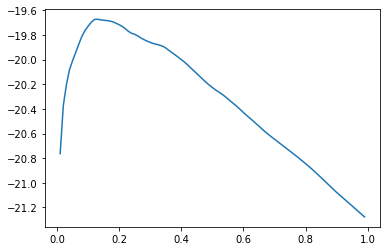

In [41]:
# trying multiple alpha values
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/100)
    lm_l = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_l, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)))

plt.plot(alpha, error)

In [44]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns=["alpha", "error"])
df_err[df_err.error == max(df_err.error)]

alpha      error
12   0.13 -19.671324

### Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train, y_train, scoring="neg_mean_absolute_error", cv=3))

-15.639908988360766

### GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators": range(10,300,10), "criterion": ("mse", "mae"), "max_features": ("auto", "sqrt", "log2", )}

gs = GridSearchCV(rf, parameters, scoring="neg_mean_absolute_error", cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [50]:
gs.best_score_

-15.208473112946464

In [51]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=260)

### Test Ensembles

In [54]:
# replace parameter with best parameters
lm = LinearRegression()
lm_l = Lasso(alpha=0.13)
rf = RandomForestRegressor(criterion='mae', n_estimators=260)

# re-fit
lm.fit(X_train, y_train)
lm_l.fit(X_train, y_train)
rf.fit(X_train, y_train)

# predict
tpred_lm = lm.predict(X_test)
tpred_lm_l = lm_l.predict(X_test)
tpred_rf = rf.predict(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, tpred_lm)

51708807.57777559

In [59]:
mean_absolute_error(y_test, tpred_lm_l)

21.270082646413616

In [60]:
mean_absolute_error(y_test, tpred_rf)

11.654639907072793

In [62]:
mean_absolute_error(y_test, (tpred_lm_l + tpred_rf)/2)

15.874104287064078